BREWEBERIES:
- Unnamed: 0	
- name	
- city	
- state

BEERS :
- Unnamed: 0
- abv	
- ibu	
- id	
- brewery_id	
- ounces

*ABV es el acrónimo de Alcohol By Volume (alcohol por volumen) y por lo general se muestra como un porcentaje. ... Este porcentaje nos permite saber entonces cuánto de su cerveza es alcohol


ANALISIS PREVIO:
- Hay columnas que no me sirven (unnnamed : 0 )
- veo cierta irregularidad en cantidad de bares por estado (quizas deba hacer un bar plot y comparar con la media)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#otros
import matplotlib.pyplot as plt


In [2]:
## Subo las tablas : Beers, Breweries
df_beers = pd.read_csv('/Users/black/Data/craft-cans/beers.csv')
df_breweries = pd.read_csv('/Users/black/Data/craft-cans/breweries.csv')
df_consumo = pd.read_csv('/Users/black/Data/craft-cans/consumo.csv')

# Estudio TABLA Beers



In [3]:
df_beers.head(5)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
#Agrego una columna de precios de cada cerveza
# fuente: https://stackoverflow.com/questions/30327417/pandas-create-new-column-in-df-with-random-integers-from-range?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

df_beers['precio'] = np.random.randint(3, 8, df_beers.shape[0])
df_beers.head(2)


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces,precio
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,5


In [5]:
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
df_beers.rename(columns={'id':'beer_id','name':'beer_name','style':'beer_style'}, inplace = True)


In [6]:
#Elimino la primera columna 
# https://stackoverflow.com/questions/20297317/python-dataframe-pandas-drop-column-using-int?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
#df_beers = df_Beers.drop(df_Beers.columns[0], axis=1)

#Verifico head()
df_beers.head(2)


,Unnamed: 0,abv,ibu,beer_id,beer_name,beer_style,brewery_id,ounces,precio
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,5


## HAY NULLS Values? Veo de forma cualitativo
df_beers.isnull().any()

In [7]:
# Veo # nulls 
# Tipo de dato, cantidad de non-null, total index
df_beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 9 columns):
Unnamed: 0    2410 non-null int64
abv           2348 non-null float64
ibu           1405 non-null float64
beer_id       2410 non-null int64
beer_name     2410 non-null object
beer_style    2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
precio        2410 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 169.5+ KB


- Podemos ver que de 2410 filas (ver index) podemos ver cuantos NULLS hay en cada columna. Simplemente restamos :#index- #non-null.
- Me quedo con todas las columnas. 

# Estudio TABLA Breweries

In [8]:
# Columnas TABLA Breweries
df_breweries.head(10)

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
5,5,COAST Brewing Company,Charleston,SC
6,6,Great Divide Brewing Company,Denver,CO
7,7,Tapistry Brewing,Bridgman,MI
8,8,Big Lake Brewing,Holland,MI
9,9,The Mitten Brewing Company,Grand Rapids,MI


In [9]:
#Elimino columna Unnamed:0 de tabla df_Breweries
df_breweries = df_breweries.drop(df_breweries.columns[0], axis=1)
df_breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [10]:
#df_Breweries.rename(columns={'name':'brewer_name'}, inplace=True)

In [11]:
#Genero una columna brewery_id con el valor del index
df_breweries['brewery_id'] = df_breweries.index



In [12]:
df_breweries.rename(columns={'name':'brewer_name'}, inplace= True)
df_breweries.head()

,brewer_name,city,state,brewery_id
0,NorthGate Brewing,Minneapolis,MN,0
1,Against the Grain Brewery,Louisville,KY,1
2,Jack's Abby Craft Lagers,Framingham,MA,2
3,Mike Hess Brewing Company,San Diego,CA,3
4,Fort Point Beer Company,San Francisco,CA,4


In [13]:
# HAY NULLS Values? Veo de forma cualitativo
df_breweries.isnull().any()

brewer_name    False
city           False
state          False
brewery_id     False
dtype: bool

- No hay NULLs Values

In [14]:
# Veo # nulls 
# Tipo de dato, cantidad de non-null, total index
df_breweries.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
brewer_name    558 non-null object
city           558 non-null object
state          558 non-null object
brewery_id     558 non-null int64
dtypes: int64(1), object(3)
memory usage: 17.5+ KB


- Notamos que no hay NULLS values: el total en el index es igual enc ada atributo.

In [15]:
cantidad_style = df_beers['beer_style'].value_counts()
cantidad_style.head(5)

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: beer_style, dtype: int64

Text(0,0.5,'Frecuencia')

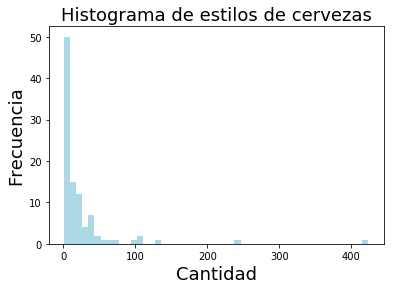

In [16]:
histograma_style = cantidad_style.plot.hist(bins=50, color='lightblue')
histograma_style.set_title("Histograma de estilos de cervezas", fontsize=18)
histograma_style.set_xlabel("Cantidad",fontsize=18)
histograma_style.set_ylabel("Frecuencia", fontsize=18)


/Users/black/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

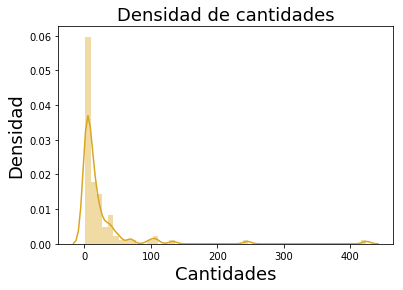

In [17]:
# Densidad de Cantidad de Estilos
densidadhistograma = sns.distplot(cantidad_style, color='goldenrod')
densidadhistograma.set_title("Densidad de cantidades", fontsize=18)
densidadhistograma.set_xlabel("Cantidades",fontsize=18)
densidadhistograma.set_ylabel("Densidad", fontsize=18)

- El 60% de los estilos ESTAN ENTRE 0 Y 50 VECES 

# Estudio de TABLA Consumo

In [18]:
df_consumo.head(10)

,Order_Id,brewer_name
0,1,Twisted Pine Brewing Company
1,2,Perrin Brewing Company
2,3,Midnight Sun Brewing Company
3,4,Indeed Brewing Company
4,5,Long Trail Brewing Company
5,6,Marshall Wharf Brewing Company
6,7,Big River Brewing Company
7,8,Southampton Publick House
8,9,Bohemian Brewery
9,10,Rivertowne Brewing Company


In [19]:
# Cambio el nombre Order_Id por order_id
# ej: data.rename(columns={'gdp':'log(gdp)'}, inplace=True)
df_consumo.rename(columns={'Order_Id': 'order_id'}, inplace=True)

In [20]:
# EL order_id es el nuevo indice
df_consumo.set_index('order_id').head(10)

,brewer_name
order_id,
1,Twisted Pine Brewing Company
2,Perrin Brewing Company
3,Midnight Sun Brewing Company
4,Indeed Brewing Company
5,Long Trail Brewing Company
6,Marshall Wharf Brewing Company
7,Big River Brewing Company
8,Southampton Publick House
9,Bohemian Brewery


# MERGE TABLES

In [42]:
#Uno tablas con valores que coincide. no toma NaNs!

df = df_beers.merge(df_breweries, on="brewery_id") # si sumo ,how='OUTER' pega una tabla al lado de la otra

df['dummy'] = 1
df


,Unnamed: 0,abv,ibu,beer_id,beer_name,beer_style,brewery_id,ounces,precio,brewer_name,city,state,dummy
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,5,18th Street Brewery,Gary,IN,1
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,6,18th Street Brewery,Gary,IN,1
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,3,18th Street Brewery,Gary,IN,1
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,5,18th Street Brewery,Gary,IN,1
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,4,18th Street Brewery,Gary,IN,1
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,6,18th Street Brewery,Gary,IN,1
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0,7,18th Street Brewery,Gary,IN,1
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,5,18th Street Brewery,Gary,IN,1
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,5,18th Street Brewery,Gary,IN,1


In [58]:
# SACO COLUMNA Unnamed:0

df = df.drop(['Unnamed: 0'], axis=1);



ValueError: labels ['Unnamed: 0'] not contained in axis

- ya hice la tabla merge
- ahora empiezo a estudiar la info

    

# hacer el join entre CONSUMO y DF (merge)

In [35]:
### uno consumo con el merge anterio (que genere 'df')

##df.join(consumo, on=brewer_name, how='inner')
df_total = pd.merge(df, df_consumo, on='brewer_name', how='inner')

print(df_total)

df_total.head(10)



       Unnamed: 0    abv   ibu  beer_id             beer_name  \
0               0  0.050   NaN     1436              Pub Beer   
1               0  0.050   NaN     1436              Pub Beer   
2               0  0.050   NaN     1436              Pub Beer   
3               0  0.050   NaN     1436              Pub Beer   
4               0  0.050   NaN     1436              Pub Beer   
5               0  0.050   NaN     1436              Pub Beer   
6               0  0.050   NaN     1436              Pub Beer   
7               0  0.050   NaN     1436              Pub Beer   
8               0  0.050   NaN     1436              Pub Beer   
9               1  0.066   NaN     2265           Devil's Cup   
10              1  0.066   NaN     2265           Devil's Cup   
11              1  0.066   NaN     2265           Devil's Cup   
12              1  0.066   NaN     2265           Devil's Cup   
13              1  0.066   NaN     2265           Devil's Cup   
14              1  0.066 

,Unnamed: 0,abv,ibu,beer_id,beer_name,beer_style,brewery_id,ounces,precio,brewer_name,city,state,dummy,order_id
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,1377
1,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,1441
2,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,1757
3,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,1826
4,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,1928
5,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,2392
6,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,2848
7,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,3595
8,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1,4207
9,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,5,18th Street Brewery,Gary,IN,1,602


In [36]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23219 entries, 0 to 23218
Data columns (total 14 columns):
Unnamed: 0     23219 non-null int64
abv            22597 non-null float64
ibu            13869 non-null float64
beer_id        23219 non-null int64
beer_name      23219 non-null object
beer_style     23147 non-null object
brewery_id     23219 non-null int64
ounces         23219 non-null float64
precio         23219 non-null int64
brewer_name    23219 non-null object
city           23219 non-null object
state          23219 non-null object
dummy          23219 non-null int64
order_id       23219 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 2.7+ MB


# ANALISIS

IDEAS
- Cantidad de bares por state.
- Cantidad de kraft beer por state.
- Buscar long y latitud de cada estado para plotear.
    

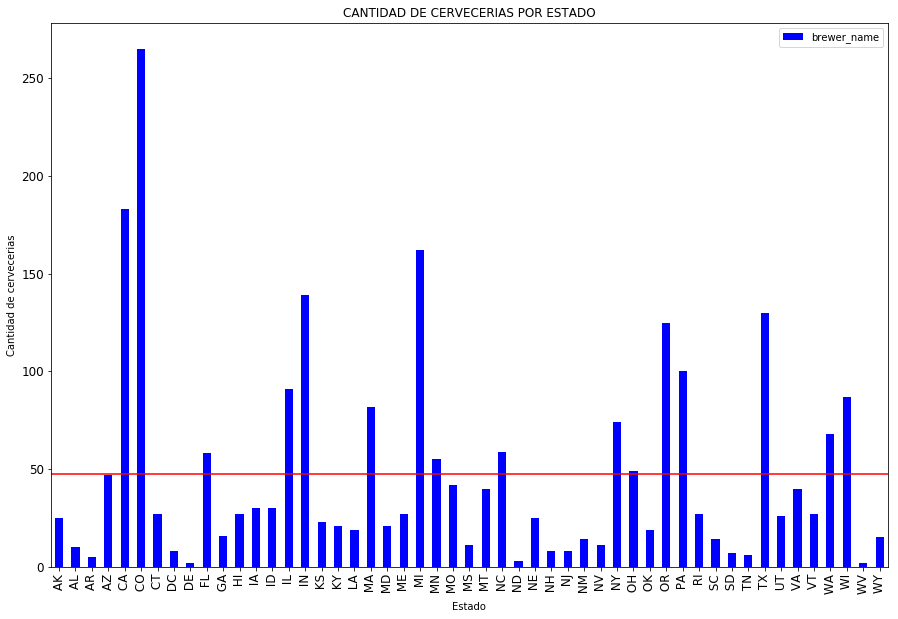

In [37]:
#BAR PLOT de grupo
plot_1 = df.groupby('state').brewer_name.count().plot(kind='bar',title ="CANTIDAD DE CERVECERIAS POR ESTADO", figsize=(15, 10),color='blue', legend=True, fontsize=12)
df_1 =df.groupby('state').brewer_name.count()

plot_1.set_xlabel('Estado')
plot_1.set_ylabel('Cantidad de cervecerias')

#Agrego la inea de la media ( de cantidad de bares)
linea_media = plot_1.axhline(df.state.value_counts().mean(), color='red',\
                             label='Cantidad promedio de cervercerias')






- Veo que hay casos que superan la media y muchos otros que no.



Text(0,0.5,'Cantidad de cervecerias')

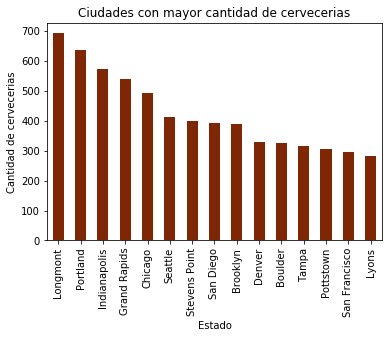

In [38]:
plot_2 = df_total.groupby('city')['brewer_name'].count().nlargest(15).plot(kind='bar', \
               title='Ciudades con mayor cantidad de cervecerias', \
               colormap='Oranges_r',  )
plot_2.set_ylabel('Cantidad de cervecerias')

plot_2.set_xlabel('Estado')
plot_2.set_ylabel('Cantidad de cervecerias')

Text(0,0.5,'Cantidad de cervecerias')

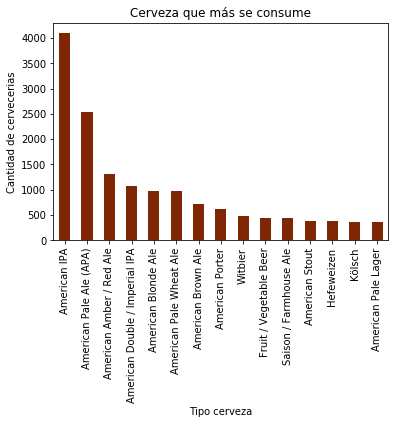

In [39]:
plot_4 = df_total.groupby('beer_style')['beer_name'].count().nlargest(15).plot(kind='bar', \
               title='Cerveza que más se consume', \
               colormap='Oranges_r',  )
plot_4.set_ylabel('Cantidad de cervecerias')

plot_4.set_xlabel('Tipo cerveza')
plot_4.set_ylabel('Cantidad de cervecerias')

- La american IPA y American Pale Ale estan en mas de 4000 y 2500  cervecerias. Por lo que son las que mas se consume



Text(0,0.5,'cantidad Bares/Ganancia')

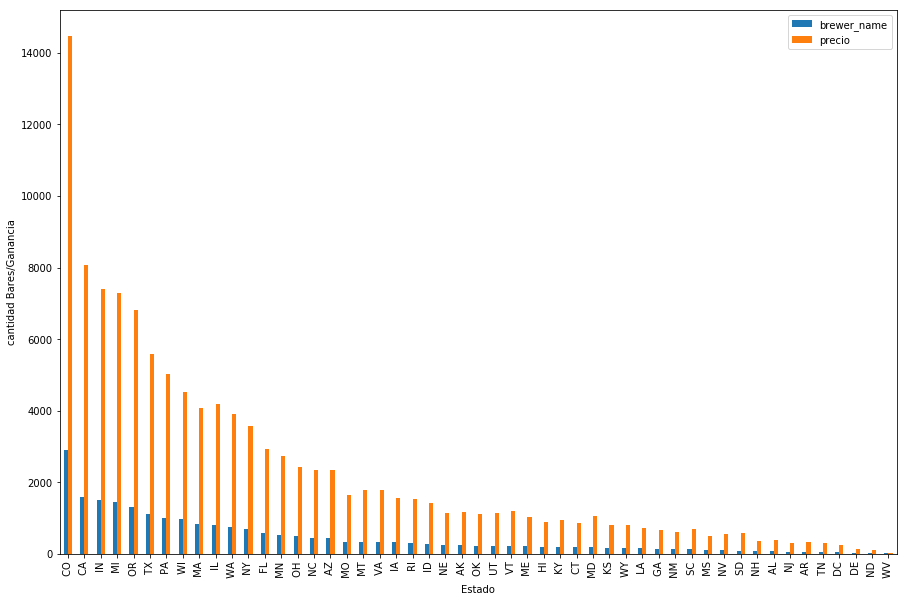

In [40]:
# Quiero saber que estado factura mas: considero que por birra hay UN SOLO consumidor (no tengo la info de la cantidad de consumidores por bar) y que la suma de los precios es el total facturado.
# df.groupby('columna1').agg({'columna2': ['min', 'max'], 'columna3': 'sum'})

plot_3 = df_total.groupby('state').agg({'brewer_name':'count','precio':'sum'}).sort_values(by = 'brewer_name',ascending=False).plot(kind='bar', figsize=(15, 10))

plot_3.set_xlabel('Estado')
plot_3.set_ylabel('cantidad Bares/Ganancia')


In [43]:
correlacion = df.corr()
correlacion

,Unnamed: 0,abv,ibu,beer_id,brewery_id,ounces,precio,dummy
Unnamed: 0,1.000000,0.006547,0.019885,-0.077488,-0.012088,0.037981,-0.030204,NaN
abv,0.006547,1.000000,0.670621,0.042811,-0.098632,0.172529,-0.037919,NaN
ibu,0.019885,0.670621,1.000000,0.000485,-0.004875,0.054691,-0.015614,NaN
beer_id,-0.077488,0.042811,0.000485,1.000000,-0.504030,0.100843,0.033427,NaN
brewery_id,-0.012088,-0.098632,-0.004875,-0.504030,1.000000,-0.133762,-0.017679,NaN
ounces,0.037981,0.172529,0.054691,0.100843,-0.133762,1.000000,0.021294,NaN
precio,-0.030204,-0.037919,-0.015614,0.033427,-0.017679,0.021294,1.000000,NaN
dummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


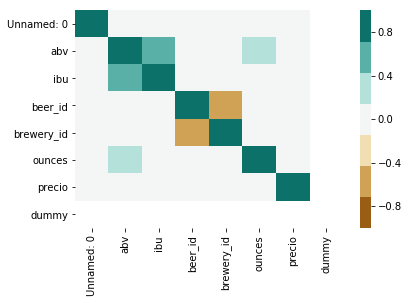

In [44]:

#fuente: https://stackoverflow.com/questions/39409866/correlation-heatmap?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

heatmap = sns.heatmap(correlacion, 
        xticklabels=correlacion.columns,
        yticklabels=correlacion.columns, vmin=-1, vmax=1, cmap=sns.color_palette("BrBG", 7))


- vemos que hay relacion directa del 40% entre ABV

- La exploracion no es muy profunda. Voy a buscar la forma de conocer la relacion entre el estado, la ganancia y el precio.

In [52]:
df.drop(['Unnamed: 0'], axis=1)


,abv,ibu,beer_id,beer_name,beer_style,brewery_id,ounces,precio,brewer_name,city,state,dummy
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5,10 Barrel Brewing Company,Bend,OR,1
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,5,18th Street Brewery,Gary,IN,1
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,6,18th Street Brewery,Gary,IN,1
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,3,18th Street Brewery,Gary,IN,1
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,5,18th Street Brewery,Gary,IN,1
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,4,18th Street Brewery,Gary,IN,1
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,6,18th Street Brewery,Gary,IN,1
7,0.065,NaN,2259,Foreman,American Porter,177,12.0,7,18th Street Brewery,Gary,IN,1
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,5,18th Street Brewery,Gary,IN,1
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,5,18th Street Brewery,Gary,IN,1


In [69]:
#Busco agrupar por estado y ciudad para analisis mas profundo
# ver: https://www.youtube.com/watch?v=Wb2Tp35dZ-I




In [ ]:
for city in df_1:
    print('city')

In [70]:
#trabajar en el geomap por $, consumo, #alcohol
#hacer group by city, state luego jugar un poco
#hacer geomap by $ y cantidad de pedidos
